In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import img_as_float
from skimage import exposure

In [2]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    # Преобразование изображения в формат с плавающей запятой двойной точности
    image = img_as_float(image)
    ax_img, ax_hist = axes
    # Создайте новые оси с невидимой осью X и независимой осью Y.
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)

    # Display histogram
    ax_hist.hist(image.flatten(), bins=bins, histtype='step', color='black')
    ax_hist.set_xlabel('Pixel intensity',fontsize=25)
    ax_hist.tick_params(axis="x", labelsize=20)
    ax_hist.tick_params(axis="y", labelsize=20)
    
    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

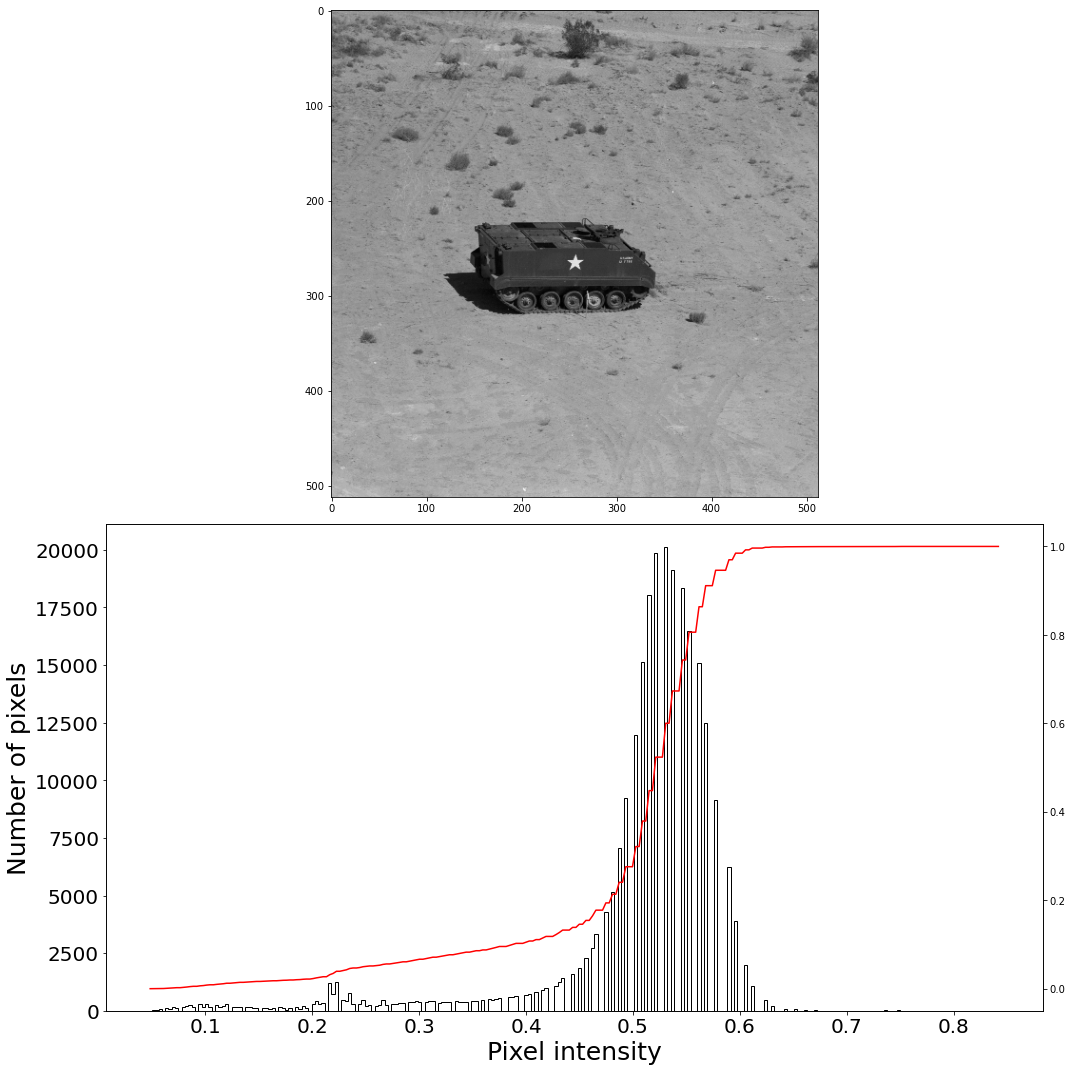

In [3]:
img = plt.imread('01_apc.tif')

fig = plt.figure(figsize=(15, 15))
axes=np.zeros((2,1),dtype=object)
axes[0,0]=fig.add_subplot(211)
axes[1,0]=fig.add_subplot(212)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[:,0])
ax_hist.set_ylabel('Number of pixels',fontsize=25)


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Пороговая обработка

In [4]:
t=0.3*255
threshold_img=img.copy()
threshold_img.shape

(512, 512)

In [5]:
threshold_img=threshold_img>t
threshold_img=threshold_img.astype(np.uint8)*255
threshold_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

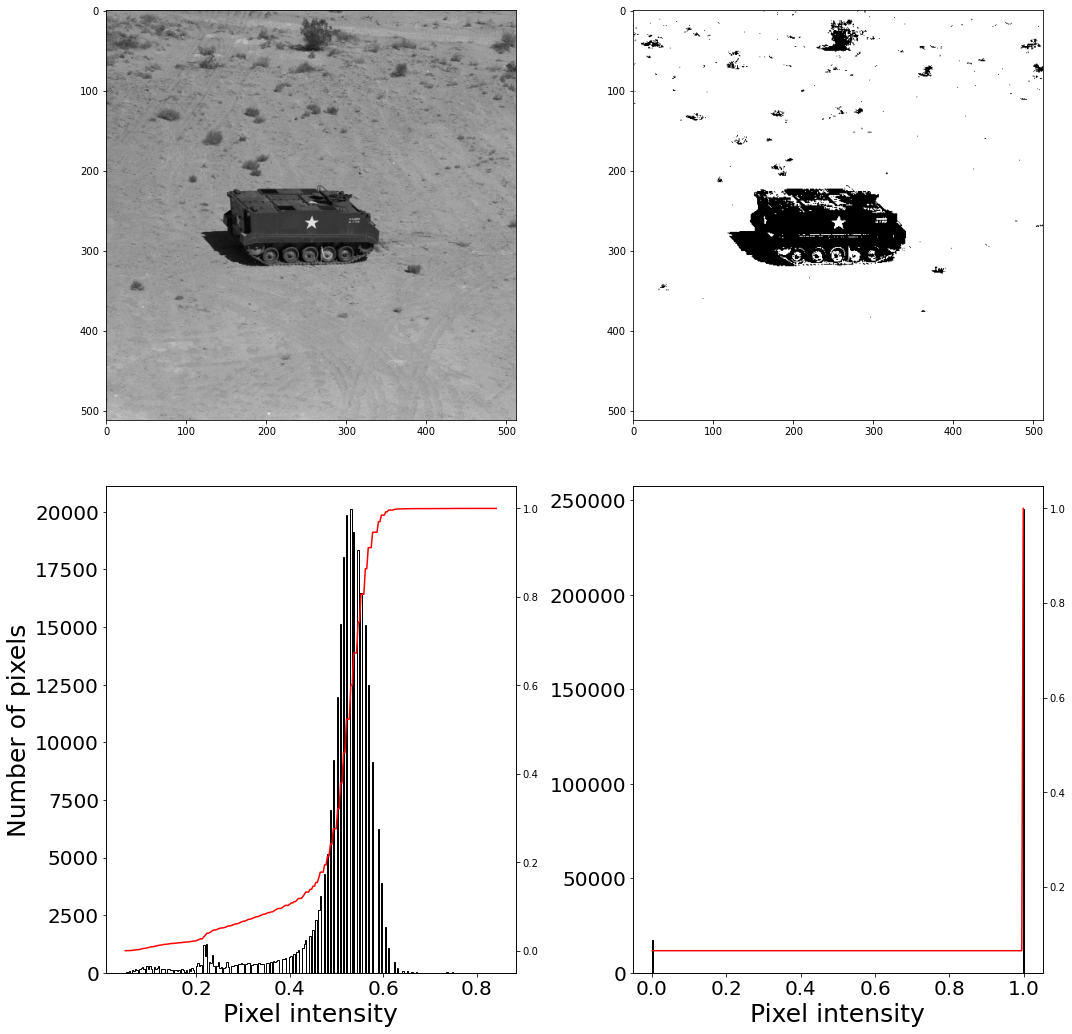

In [6]:
fig = plt.figure(figsize=(15, 15))
axes=np.zeros((2,2),dtype=object)
axes[0,0]=fig.add_subplot(221)
axes[0,1]=fig.add_subplot(222)
axes[1,0]=fig.add_subplot(223)
axes[1,1]=fig.add_subplot(224)


ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[:,0])
ax_hist.set_ylabel('Number of pixels',fontsize=25)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(threshold_img,axes[:,1])


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

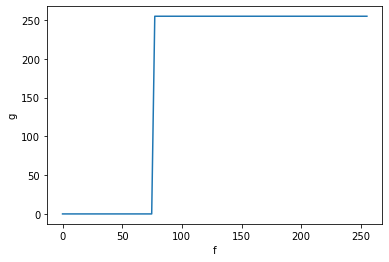

In [7]:
low=[0]*30
hight=[1]*70

y=np.array(low+hight)*255
x=np.linspace(0,1,100)*255

plt.xlabel("f")
plt.ylabel("g")

plt.plot(x,y)
plt.show()

# Контрастирование

In [8]:
f_min=0.2*255
f_max=0.6*255
g_min=0*255
g_max=1*255

In [9]:
a=(g_max-g_min)/(f_max-f_min)
b=(g_min*f_max-g_max*f_min)/(f_max-f_min)

In [10]:
contrast_img=np.round(a*img.copy()+b).astype(np.uint8)

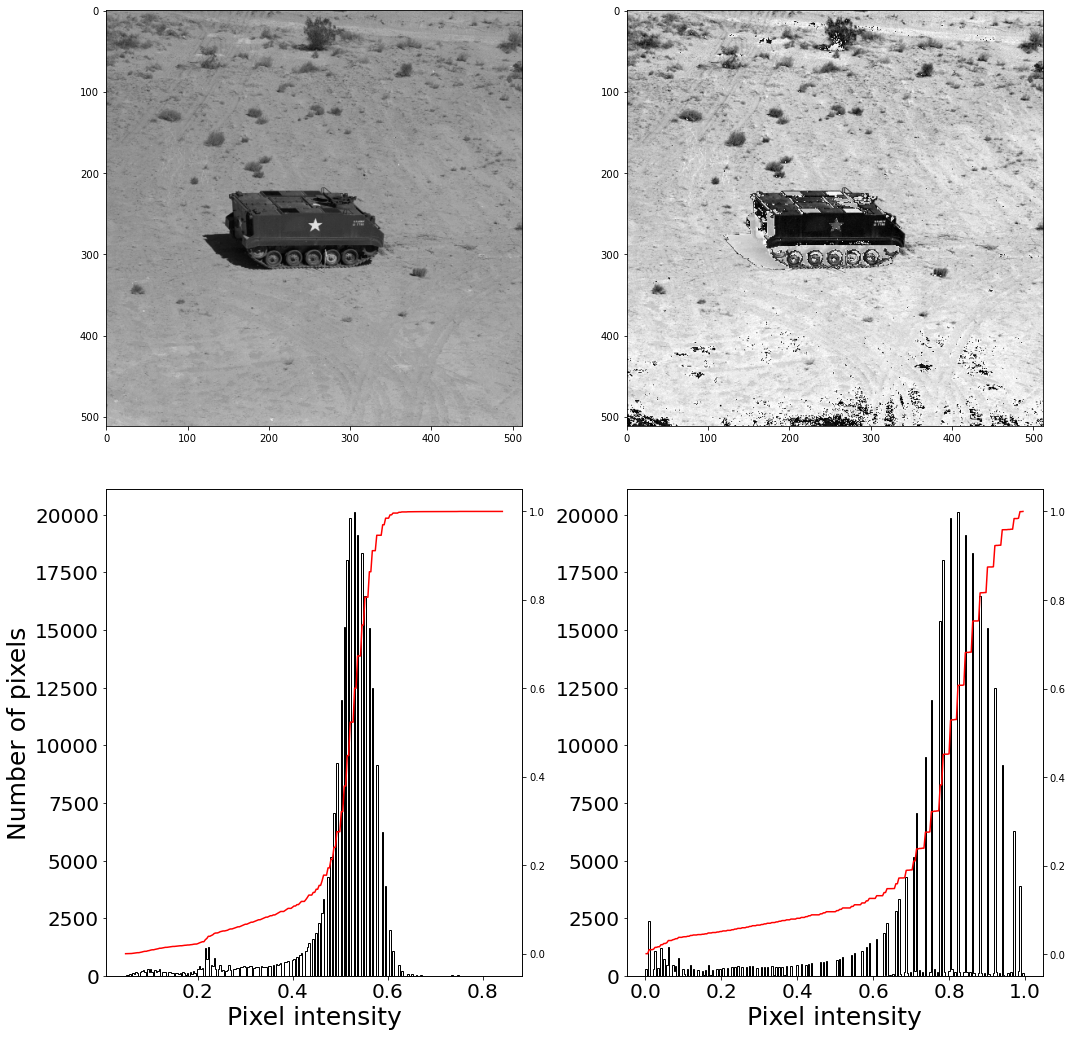

In [11]:
fig = plt.figure(figsize=(15, 15))
axes=np.zeros((2,2),dtype=object)
axes[0,0]=fig.add_subplot(221)
axes[0,1]=fig.add_subplot(222)
axes[1,0]=fig.add_subplot(223)
axes[1,1]=fig.add_subplot(224)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,[axes[0,0],axes[1,0]])
ax_hist.set_ylabel('Number of pixels',fontsize=25)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(contrast_img,[axes[0,1],axes[1,1]])

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

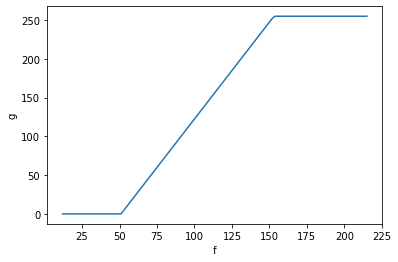

In [12]:
x=np.linspace(img.min(),img.max(),100)

f=lambda x: a*x+b
y=f(x)
y=np.where(y < 0, 0, y)
y=np.where(y > 255, 255, y)

plt.xlabel("f")
plt.ylabel("g")

plt.plot(x,y)
plt.show()

# Эквализация

In [23]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# считаем кумулятивную сумму
cdf = hist.cumsum()
print(cdf.shape)
cdf

(256,)


array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      4,     24,     47,    111,
          211,    305,    475,    601,    775,    987,   1239,   1415,
         1698,   1855,   2139,   2320,   2567,   2739,   2941,   3234,
         3416,   3588,   3772,   3916,   4072,   4189,   4301,   4414,
         4521,   4591,   4709,   4855,   4978,   5030,   5161,   5321,
         5399,   5592,   5709,   6013,   6425,   6731,   7091,   8314,
         9049,  10318,  10775,  11201,  11984,  12273,  12551,  13023,
        13245,  13479,  13682,  13917,  14402,  14664,  14955,  15263,
        15598,  15934,  16301,  16682,  17090,  17469,  17850,  18258,
        18673,  19015,  19382,  19745,  20112,  20516,  20879,  21276,
        21658,  22068,  22510,  22510,  22980,  23473,  23947,  24469,
        25021,  25021,  25615,  26218,  26863,  26863,  27529,  28263,
        29093,  29093,  30011,  30980,  30980,  32067,  33298,  34739,
      

In [24]:
g_min=0
g_max=255
# нормализуем
F=cdf/(img.shape[0]*img.shape[1])
# высчитывание новых значений яркости для выравнивания гистограммы
equalization=(g_max-g_min)*F+g_min
print(equalization.shape)
equalization

(256,)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.89099121e-03, 2.33459473e-02, 4.57191467e-02, 1.07975006e-01,
       2.05249786e-01, 2.96688080e-01, 4.62055206e-01, 5.84621429e-01,
       7.53879547e-01, 9.60102081e-01, 1.20523453e+00, 1.37643814e+00,
       1.65172577e+00, 1.80444717e+00, 2.08070755e+00, 2.25677490e+00,
       2.49704361e+00, 2.66435623e+00, 2.86085129e+00, 3.14586639e+00,
       3.32290649e+00, 3.49021912e+00, 3.66920471e+00, 3.80928040e+00,
       3.96102905e+00, 4.07484055e+00, 4.18378830e+00, 4.29370880e+00,
       4.39779282e+00, 4.46588516e+00, 4.58066940e+00, 4.72269058e+00,
       4.84233856e+00, 4.89292145e+00, 5.02035141e+00, 5.17599106e+00,
       5.25186539e+00, 5.43960571e+00, 5.55341721e+00, 5.84913254e+00,
       6.24990463e+00, 6.54756546e+00, 6.89775467e+00, 8.08742523e+00,
      

In [30]:
# выравнивание
equalization_img=equalization[img]/255
print(equalization_img.shape)
equalization_img

(512, 512)


array([[0.52358246, 0.52358246, 0.44786835, ..., 0.37910461, 0.27579117,
        0.16482544],
       [0.37910461, 0.21361542, 0.52358246, ..., 0.27579117, 0.27579117,
        0.24059677],
       [0.24059677, 0.19398499, 0.19398499, ..., 0.32136917, 0.27579117,
        0.27579117],
       ...,
       [0.99225235, 0.99629593, 0.99225235, ..., 0.96984482, 0.98475266,
        0.96984482],
       [0.98475266, 0.99225235, 0.99225235, ..., 0.99225235, 0.99225235,
        0.99629593],
       [0.99225235, 0.99629593, 0.99225235, ..., 0.99225235, 0.94610977,
        0.91126633]])

In [31]:
# Adaptive Equalization
adapteq_img = exposure.equalize_adapthist(img, clip_limit=0.1)

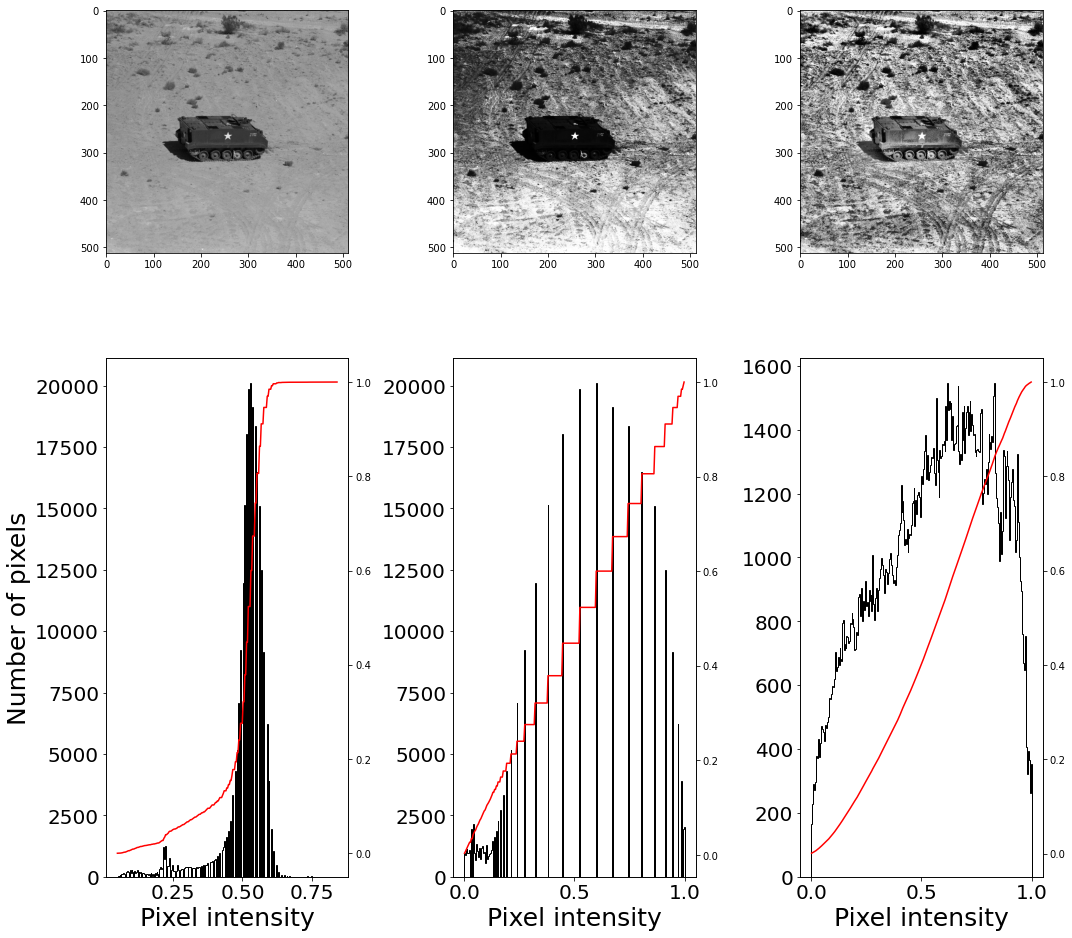

In [32]:
fig = plt.figure(figsize=(15, 15))
axes=np.zeros((2,3),dtype=object)
axes[0,0]=fig.add_subplot(231)
axes[0,1]=fig.add_subplot(232)
axes[0,2]=fig.add_subplot(233)
axes[1,0]=fig.add_subplot(234)
axes[1,1]=fig.add_subplot(235)
axes[1,2]=fig.add_subplot(236)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(img,axes[:,0])
ax_hist.set_ylabel('Number of pixels',fontsize=25)

ax_img, ax_hist, ax_cdf=plot_img_and_hist(equalization_img,axes[:,1])

ax_img, ax_hist, ax_cdf=plot_img_and_hist(adapteq_img,axes[:,2])



# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [33]:
hist, bins = np.histogram(img.copy().flatten(), 256, [0, 256])
print(hist.shape,bins.shape)

(256,) (257,)


In [28]:
hist

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     4,    20,    23,    64,   100,    94,
         170,   126,   174,   212,   252,   176,   283,   157,   284,
         181,   247,   172,   202,   293,   182,   172,   184,   144,
         156,   117,   112,   113,   107,    70,   118,   146,   123,
          52,   131,   160,    78,   193,   117,   304,   412,   306,
         360,  1223,   735,  1269,   457,   426,   783,   289,   278,
         472,   222,   234,   203,   235,   485,   262,   291,   308,
         335,   336,   367,   381,   408,   379,   381,   408,   415,
         342,   367,   363,   367,   404,   363,   397,   382,   410,
         442,     0,   470,   493,   474,   522,   552,     0,   594,
         603,   645,     0,   666,   734,   830,     0,   918,   969,
           0,  1087,  1231,  1441,     0,  1603,     0,  1868,  2276,
           0,  2722,  3346,     0,  4298,     0,  5146,  7073,     0,
        9226,     0,

In [29]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

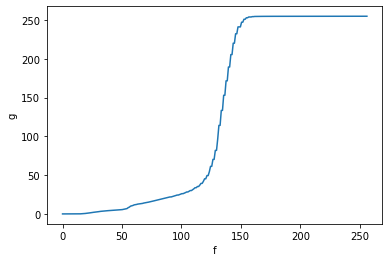

In [40]:
plt.plot(np.linspace(0,256,256),equalization)
plt.xlabel("f")
plt.ylabel("g")
plt.show()